### Display some sample stamps from each magnitude bin

In [22]:
import math as ma
import numpy as np
import matplotlib.pyplot as plt

from os.path import expanduser

from wlenet import config
from wlenet.misc.gpu import avoid_gpu_in_this_process; avoid_gpu_in_this_process()
from wlenet.models.utils import get_output_dim, load_model, load_spec, save_spec, print_spec
from wlenet.dataset.io import load_sim, load_target
from wlenet.dataset.sequences import CorrelatedNoiseSequence, generate_batches
from wlenet.misc.figures import show_stamps
from wlenet.dataset.normalization import norm_mean_std, norm_max

In [23]:
test_sets = ['clash_003_test']
mag_auto_edges = np.array([17, 20.5, 21.5, 22.5, 23.5, 25.5])
num_batches = 2000
save_figures = True

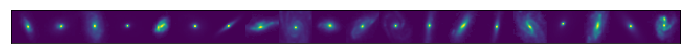

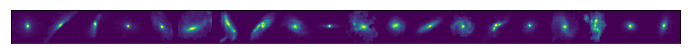

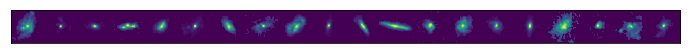

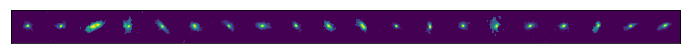

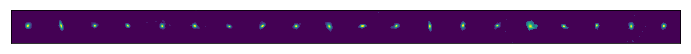

In [25]:
model_name = 'cnn_image_clash_uniform_mse'
model_spec = load_spec(model_name)
model = load_model(model_spec, load_weights=True, show_summary=False)

noise_kernel_path = config['calibration_path'] + '/' +  model_spec['kwargs_dataset']['noise_kernel_name'] + '_noise_kernel.npy'
noise_kernel = np.load(expanduser(noise_kernel_path)) *  model_spec['kwargs_dataset']['noise_kernel_factor']
post_sim = model_spec['kwargs_dataset']['post_sim']
output_dim = get_output_dim(model)

for i in range(len(mag_auto_edges) - 1):

    post_sim['mag_auto_min'] = mag_auto_edges[i]
    post_sim['mag_auto_max'] = mag_auto_edges[i+1]

    source_test = dict(zip(('x', 'y'), load_sim(test_sets, 'test', output_dim, post_sim=post_sim)))
    inds = np.random.choice(source_test['x'].shape[0], 20)
    show_stamps(source_test['x'][inds, ...], rows=1, cols=len(inds), norm_func=norm_max, clim=[0,1])
    plt.show()